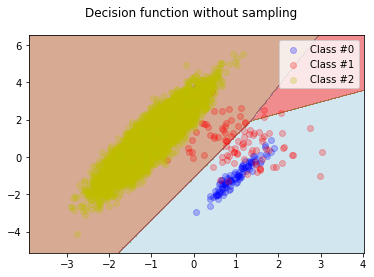

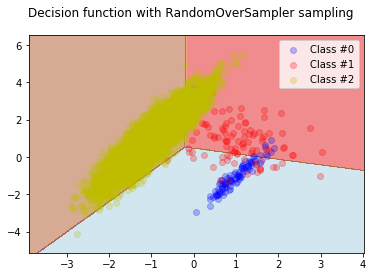

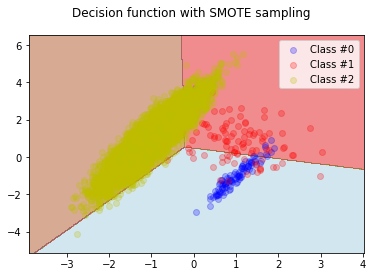

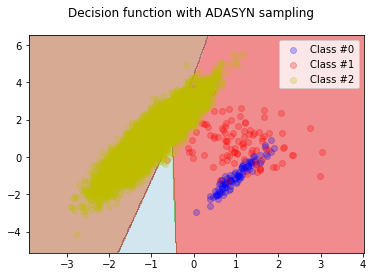

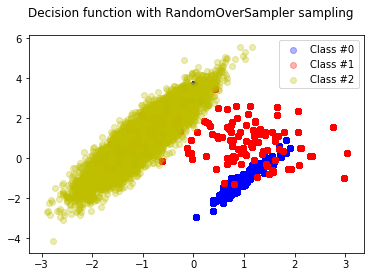

Resample dataset with the following stats Counter({2: 9736, 0: 9736, 1: 9736})


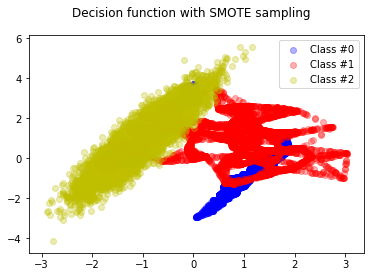

Resample dataset with the following stats Counter({2: 9736, 0: 9736, 1: 9736})


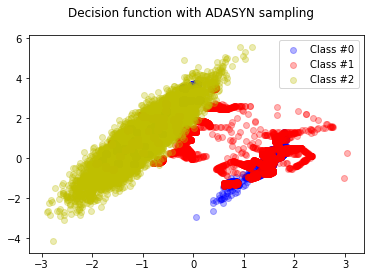

Resample dataset with the following stats Counter({2: 9736, 0: 9729, 1: 9726})


In [7]:
from collections import Counter

import numpy as np
import matplotlib.pyplot as plt

from sklearn.datasets import make_classification
from sklearn.svm import LinearSVC

from imblearn.pipeline import make_pipeline
from imblearn.over_sampling import RandomOverSampler, SMOTE, ADASYN

# Parameters
n_classes = 3
plot_colors = "bry"
plot_step = 0.02


def make_decision_plot(X, y, clf, sampler_name):
    plt.figure()
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, plot_step),
                         np.arange(y_min, y_max, plot_step))

    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    cs = plt.contourf(xx, yy, Z, cmap=plt.cm.Paired, alpha=0.5)

    for i, color in zip(range(n_classes), plot_colors):
        idx = np.where(y == i)
        plt.scatter(X[idx, 0], X[idx, 1], c=color, label='Class #{}'.format(i),
                    cmap=plt.cm.Paired, alpha=0.25)

    plt.axis("tight")
    plt.suptitle("Decision function {} sampling".format(sampler_name))
    plt.legend()
    plt.show()


def make_sampling_plot(X, y, sampling, sampler_name):
    X_res, y_res = sampling.fit_sample(X, y)
    plt.figure()
    for i, color in zip(range(n_classes), plot_colors):
        idx = np.where(y_res == i)
        plt.scatter(X_res[idx, 0], X_res[idx, 1], c=color,
                    label='Class #{}'.format(i), cmap=plt.cm.Paired,
                    alpha=0.3)
    plt.axis("tight")
    plt.suptitle("Decision function {} sampling".format(sampler_name))
    plt.legend()
    plt.show()
    print('Resample dataset with the following stats {}'.format(
        Counter(y_res)))



X, y = make_classification(n_samples=10000, n_features=2, n_informative=2,
                           n_redundant=0, n_repeated=0,
                           n_classes=n_classes, n_clusters_per_class=1,
                           weights=[0.01, 0.01, 0.98], class_sep=1,
                           random_state=0)

clf = LinearSVC().fit(X, y)
make_decision_plot(X, y, clf, 'without')

for sampling in (RandomOverSampler(random_state=0),
                 SMOTE(random_state=0),
                 ADASYN(random_state=0)):
    clf = make_pipeline(sampling, LinearSVC())
    clf.fit(X, y)
    make_decision_plot(X, y, clf, 'with {}'.format(
        sampling.__class__.__name__))


for sampling in (RandomOverSampler(), SMOTE(), ADASYN()):
    make_sampling_plot(X, y, sampling, 'with {}'.format(
        sampling.__class__.__name__))